In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


## Split

In [5]:
data = df[['stars','text','clean_text']]

In [6]:
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
2,4,Dr. Byrne is a great doctor! She has great bed...,dr byrne great doctor great bed side manner ex...
3,3,I'm raising my review as Dr Bryne's has been m...,raise review dr bryne receptive daughter go an...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...


## Select 1& 5 stars only

In [7]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## binary stars

In [8]:
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

In [9]:
data.head()

,stars,text,clean_text
0,0,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,1,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,0,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,0,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,1,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


# Multinimial NB

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

## Split Data to test train

In [11]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

X_train, X_test, y_train, y_test = train_test_split(review, sentiments, test_size=0.33, random_state=42)

In [12]:
CountVectorizer?

### `CountVectorizer`
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.


> Init signature:
```python
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', 
                strip_accents=None, lowercase=True, preprocessor=None, 
                tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', 
                ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, 
                max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
```
Docstring:     
Convert a collection of text documents to a matrix of token counts


In [13]:
vectorizer = CountVectorizer()  # count the number of words in the document
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

In [15]:
# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

## Classifier

In [16]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predict

In [17]:
pred = classifier.predict(X_test_vectorized)

## Accuracy

In [18]:
nb_nb = classifier.score(X_test_vectorized, y_test)
print(nb_nb)

0.9568430553988492


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7241
           1       0.97      0.95      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726



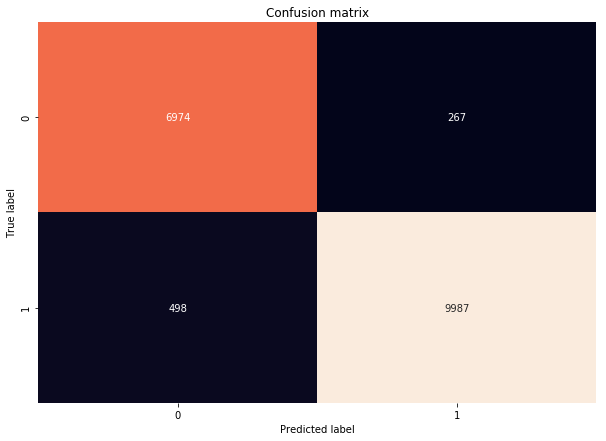

In [21]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [22]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?

In [23]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, pred))

0.9568430553988492
0.9568430553988492


## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"


In [24]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, pred))

0.043156944601150854
0.043156944601150826


# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [25]:
print(TP / float(TP + FN))
print(recall_score(y_test, pred))

0.9525035765379113
0.9525035765379113


# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [26]:
print(TN / float(TN + FP))

0.9631266399668554


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [27]:
print(FP / float(TN + FP))

0.03687336003314459


**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [28]:
print(TP / float(TP + FP))
print(precision_score(y_test, pred))

0.9739613809245172
0.9739613809245172


## Clean Text

### Split Data to test train

In [29]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

X_train, X_test, y_train, y_test = train_test_split(review_clean, sentiments, test_size=0.33, random_state=42)

In [30]:
vectorizer = CountVectorizer()  # count the number of words in the document
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

In [32]:
# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

## Classifier

In [33]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predict

In [34]:
pred = classifier.predict(X_test_vectorized)

## Accuracy

In [35]:
nb_nb = classifier.score(X_test_vectorized, y_test)
print(nb_nb)

0.9567302267855128


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7241
           1       0.97      0.95      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726



## Confusion Matrix

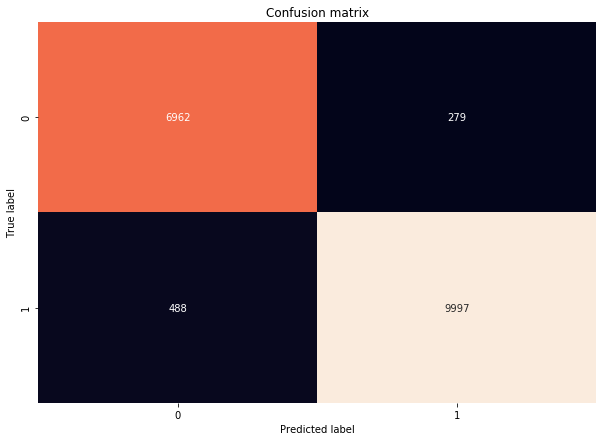

In [37]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [38]:
confusion = confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?

In [39]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, pred))

0.9567302267855128
0.9567302267855128


## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"

In [40]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, pred))

0.043269773214487196
0.04326977321448722


# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [41]:
print(TP / float(TP + FN))
print(recall_score(y_test, pred))

0.9534573199809251
0.9534573199809251


# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [42]:
print(TN / float(TN + FP))

0.9614694103024444


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [43]:
print(FP / float(TN + FP))

0.03853058969755559


**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [44]:
print(TP / float(TP + FP))
print(precision_score(y_test, pred))

0.972849357726742
0.972849357726742


In [45]:
# classifier = MultinomialNB()

# # Train the classifier
# classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

# # Vectorize the test data
# X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form

# preds = classifier.predict(X_train_vectorized)
# # Check our classifier performance
# score = classifier.score(X_test_vectorized, y_test)

# print("Accuracy=", score)

## confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [47]:
train_test_split?

## create a function

In [48]:
def nlp_MultinomialNB(X,y):
    '''func '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    vectorizer = CountVectorizer()
    vectorizer.fit(X_train)
    X_train_vectorized = vectorizer.transform(X_train)
    classifier = MultinomialNB()

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)  # we fit with the X_train_vectorized, not original X_train

    # Vectorize the test data
    X_test_vectorized = vectorizer.transform(X_test)   # we transform the text list to a matrix form


    # Check our classifier performance
    score = classifier.score(X_test_vectorized, y_test)
    return score

In [49]:
review = data['text'].values.astype(str)  # original review
review_clean = data['clean_text'].values.astype(str)  # clean text review
sentiments = data['stars'].values  # star value

In [50]:
%%time
original = nlp_MultinomialNB(review, sentiments)

CPU times: user 13.7 s, sys: 2.02 s, total: 15.7 s
Wall time: 14.5 s


In [51]:
original

0.9568430553988492

In [52]:
clean = nlp_MultinomialNB(review_clean, sentiments)
clean

0.9567302267855128

## Result Score

In [53]:
print('Original text:\t  {}'.format(original))
print('Clean text:\t  {}'.format(clean))
print('Difference:\t {}'.format(clean - original))

Original text:	  0.9568430553988492
Clean text:	  0.9567302267855128
Difference:	 -0.00011282861333639094


## Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [55]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

NameError: name 'preds' is not defined